Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [3]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

<Axes: >

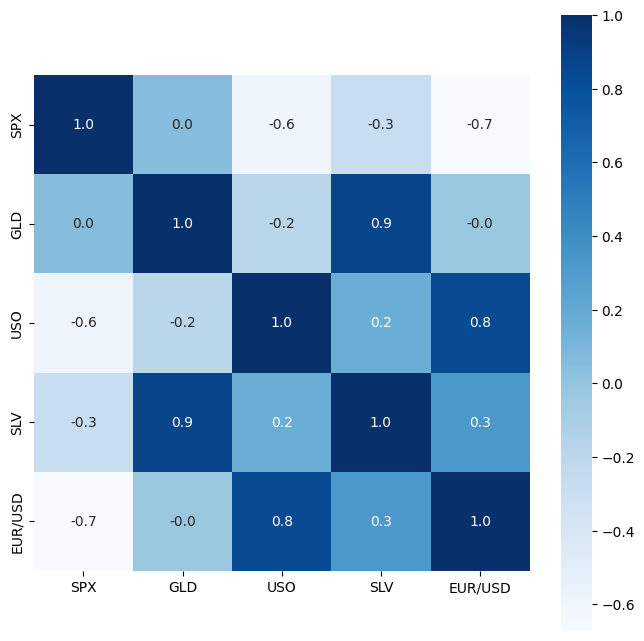

In [9]:
# Correct Code
correlation = gold_data.drop(columns=['Date']).corr()
# Note: We also drop 'Date' because correlation only works on numbers

# Then you can uncomment your heatmap code:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='Blues')

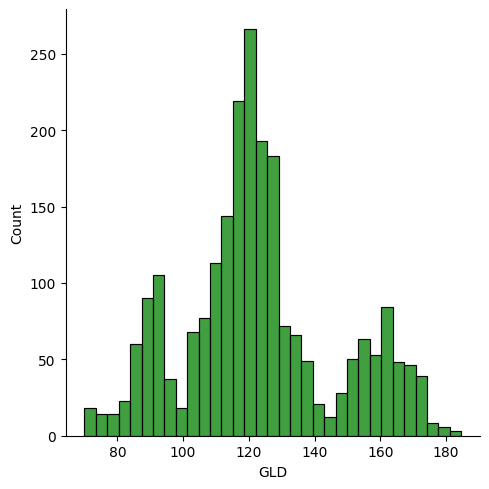

In [10]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target

In [11]:
# 1. Convert Date & Sort (Just to be safe)
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data = gold_data.sort_values('Date')

# 2. Create Lag Features (INCLUDING GOLD!)
gold_data['GLD_Lag1'] = gold_data['GLD'].shift(1)  # <--- This is the key fix
gold_data['SPX_Lag1'] = gold_data['SPX'].shift(1)
gold_data['USO_Lag1'] = gold_data['USO'].shift(1)
gold_data['SLV_Lag1'] = gold_data['SLV'].shift(1)
gold_data['EUR/USD_Lag1'] = gold_data['EUR/USD'].shift(1)

# 3. Drop the first row (NaNs)
gold_data = gold_data.dropna()

# 4. Prepare Features and Target
# We drop the 'current day' columns to prevent leakage
features = gold_data.drop(columns=['Date', 'SPX', 'USO', 'SLV', 'EUR/USD', 'GLD'])
target = gold_data['GLD']

# 5. Split (Time Series Logic)
split_index = int(len(features) * 0.8)
X_train = features[:split_index]
X_test = features[split_index:]
Y_train = target[:split_index]
Y_test = target[split_index:]

print(f"Training shapes: X={X_train.shape}, Y={Y_train.shape}")

Training shapes: X=(1831, 5), Y=(1831,)


Model Training:
Random Forest Regressor

In [12]:
regressor = RandomForestRegressor(n_estimators=100)

In [13]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [14]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [15]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.922434821962566


Compare the actual values and predicted values in a plot

In [16]:
Y_test = list(Y_test)

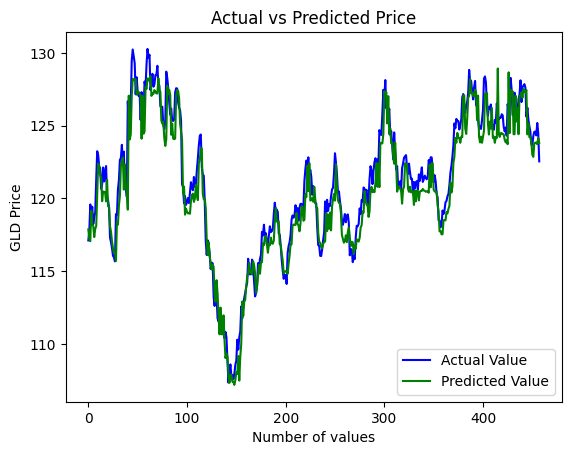

In [17]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [18]:
# Example logic (concept):
# Use SPX, USO, SLV from (t-1) to predict GLD at (t)
gold_data['SPX_Lag1'] = gold_data['SPX'].shift(1)
gold_data['USO_Lag1'] = gold_data['USO'].shift(1)
gold_data['SLV_Lag1'] = gold_data['SLV'].shift(1)

# Drop the first row (which will contain NaN after shifting)
gold_data = gold_data.dropna()

In [19]:
from sklearn.metrics import mean_absolute_error

# Calculate predictions
test_data_prediction = regressor.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(Y_test, test_data_prediction)
print(f"Mean Absolute Error: ${mae:.2f}")

Mean Absolute Error: $1.06


# Real Performance

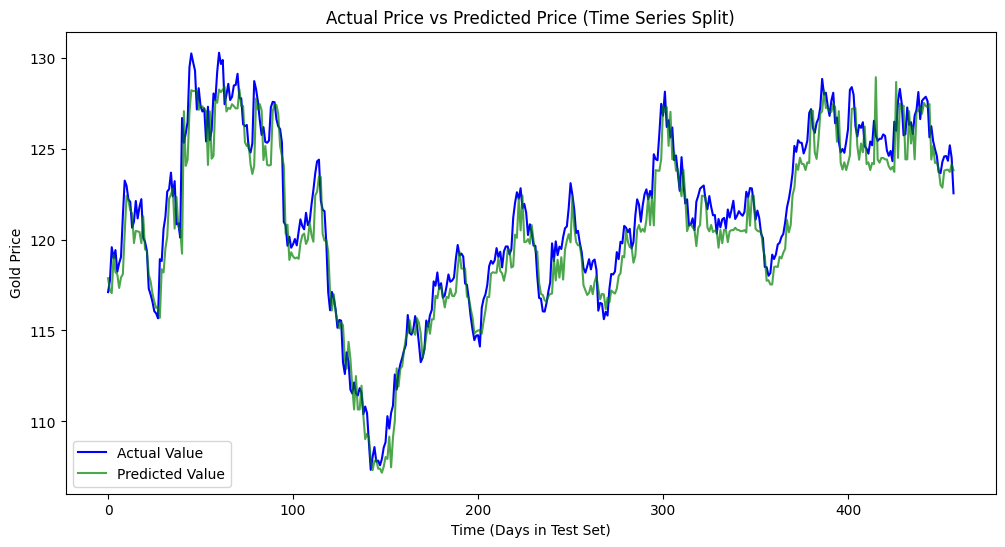

In [20]:
# 1. Get predictions on the test set
test_data_prediction = regressor.predict(X_test)

# 2. Convert Y_test to a list so it plots correctly
Y_test_list = list(Y_test)

# 3. Plot
plt.figure(figsize=(12, 6))
plt.plot(Y_test_list, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value', alpha=0.7)
plt.title('Actual Price vs Predicted Price (Time Series Split)')
plt.xlabel('Time (Days in Test Set)')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [21]:
import joblib

# Save the model
joblib.dump(regressor, 'gold_price_model.pkl')
print("Model saved as gold_price_model.pkl")

Model saved as gold_price_model.pkl
